In [1]:
import pandas as pd

In [2]:
df_bol = pd.read_csv('covid-bolivia.csv')

df_bol.head()

,Fecha,Nuevos casos,Casos totales,Muertes totales,Recuperados totales
0,10/03,2,2,0,0
1,11/03,1,3,0,0
2,12/03,0,3,0,0
3,13/03,7,10,0,0
4,14/03,0,10,0,0


In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.style.use('fivethirtyeight')
%matplotlib notebook

In [5]:
params = {'ticks': range(len(df_bol)), 'labels': df_bol['Fecha'], 'rotation': 70}

<IPython.core.display.Javascript object>


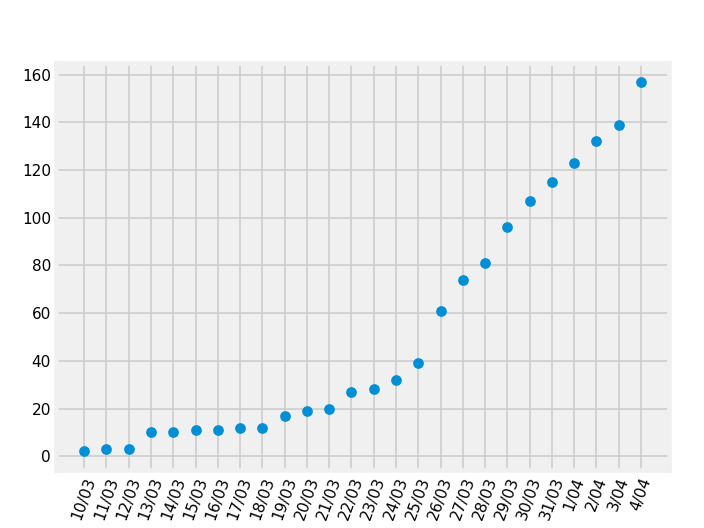

In [6]:
plt.plot(df_bol['Casos\ntotales'], 'o')
plt.xticks(**params)
plt.show()

<IPython.core.display.Javascript object>


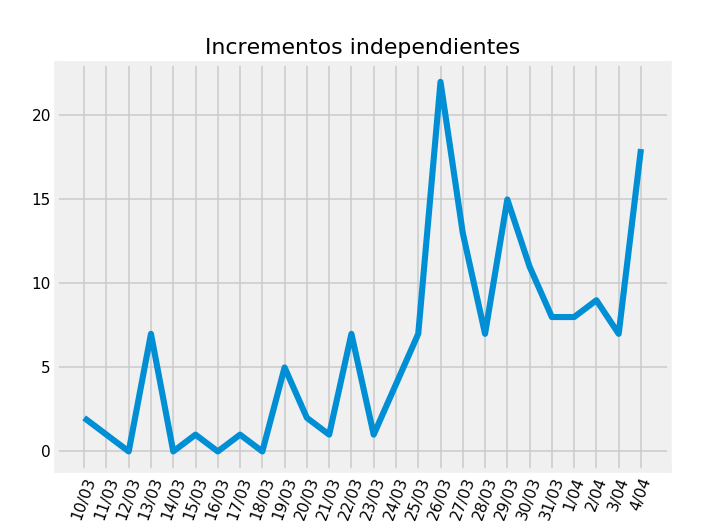

In [25]:
plt.title('Incrementos independientes')
plt.plot(df_bol['Nuevos\ncasos'])
plt.xticks(**params)
plt.show()

<IPython.core.display.Javascript object>


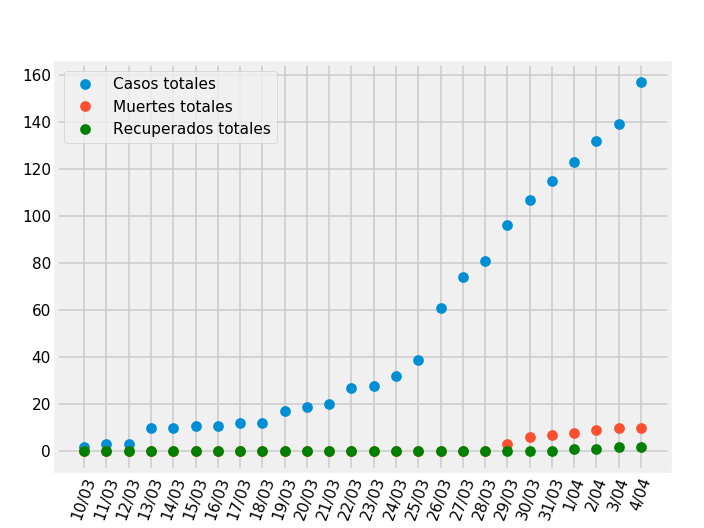

In [24]:
plt.plot(df_bol['Casos\ntotales'], 'o', label='Casos totales')
plt.plot(df_bol['Muertes\ntotales'], 'o', label='Muertes totales')
plt.plot(df_bol['Recuperados\ntotales'], 'go', label='Recuperados totales')
plt.legend()
plt.xticks(**params)
plt.show()

In [11]:
import numpy as np

<IPython.core.display.Javascript object>


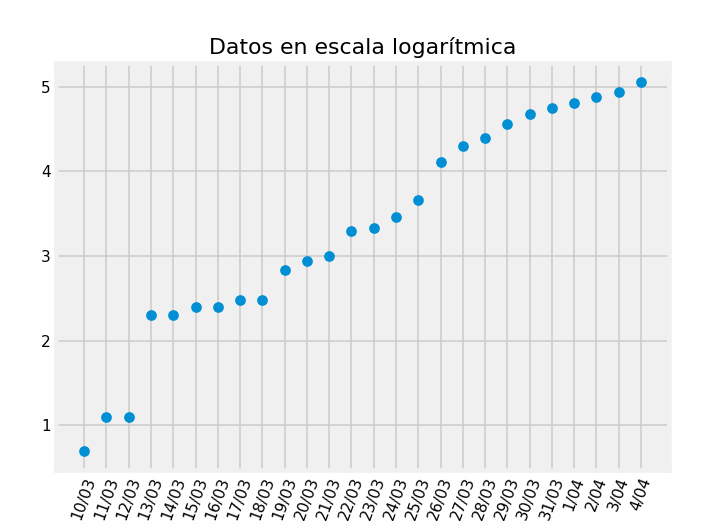

In [13]:
plt.title('Datos en escala logarítmica')
plt.plot(np.log(df_bol['Casos\ntotales']), 'o')
plt.xticks(**params)
plt.show()

## Ajustando una regresión lineal simple

In [35]:
X = np.array([np.ones(len(df_bol)), np.arange(len(df_bol))+1]).T
Y = df_bol['Casos\ntotales']
Y_log = np.log(Y)

$$\mathbf{\beta} = (\mathrm{X'}\cdot \mathrm{X})^{-1}\cdot \mathrm{X}' \cdot \mathbf{y}$$

In [47]:
β = np.linalg.solve(X.T@X, X.T@Y_log)

<IPython.core.display.Javascript object>


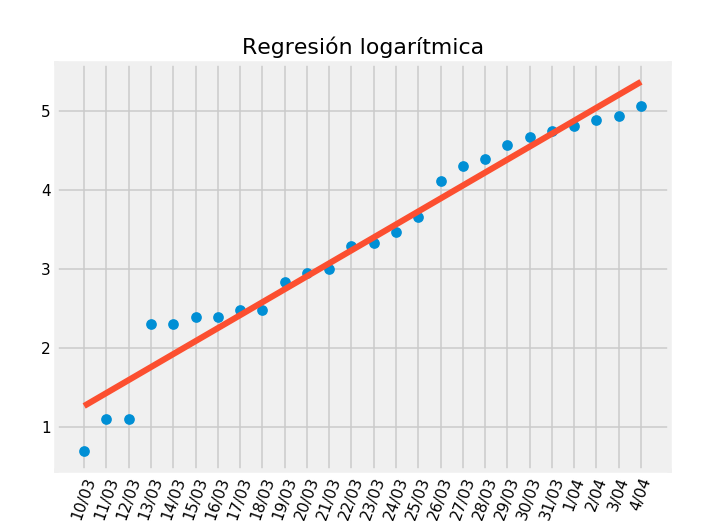

In [50]:
plt.title('Regresión logarítmica')
plt.plot(np.log(df_bol['Casos\ntotales']), 'o')
plt.plot(X[:, 1]-1, X@β)
plt.xticks(**params)
plt.show()

In [68]:
t = 3
X_pred = np.array([np.ones(t+1), np.arange(X[-1, -1], X[-1, -1]+ (t+1))]).T
print(X_pred)

[[ 1. 26.]
 [ 1. 27.]
 [ 1. 28.]
 [ 1. 29.]]


<IPython.core.display.Javascript object>


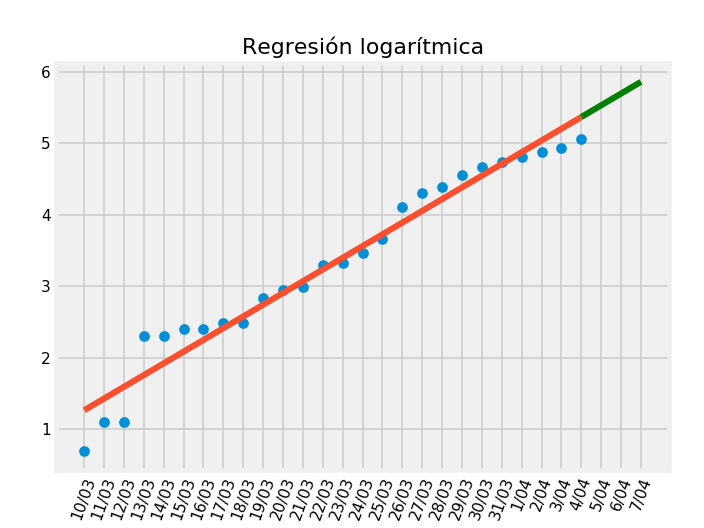

In [89]:
m, n = df_bol.shape

plt.title('Regresión logarítmica')
plt.plot(np.log(df_bol['Casos\ntotales']), 'o')
plt.plot(X[:, 1]-1, X@β)

pred = X_pred@β
plt.plot(X_pred[:, 1]-1, pred, 'g')

pred_params = params.copy()
pred_params['ticks'] = range(m+t)
pred_params['labels'] = params['labels'].tolist() + [f'{i}/04' for i in range(5, 5+t)]
plt.xticks(**pred_params)
plt.show()

In [160]:
for d, p in zip(pred_params['labels'][m:], pred[1:]):
    print(f'fecha{d} -> casos:{int(np.round(np.exp(p)))}')

fecha5/04 -> casos:253
fecha6/04 -> casos:298
fecha7/04 -> casos:351


<IPython.core.display.Javascript object>


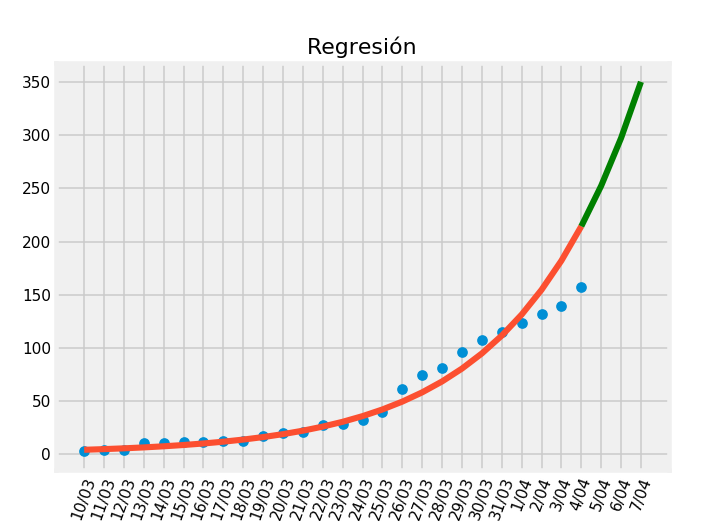

In [157]:
plt.title('Regresión')
plt.plot(df_bol['Casos\ntotales'], 'o')
plt.plot(X[:, 1]-1, np.exp(X@β))

pred = X_pred@β
plt.plot(X_pred[:, 1]-1, np.exp(pred), 'g')

plt.xticks(**pred_params)
plt.show()

## Ajuste polinomial

In [95]:
def ϕ(X: np.ndarray, m: int) -> np.ndarray:
    A = np.zeros((len(X), m+1))
    for i, x in enumerate(X):
        for j in range(m+1):
            A[i, j] = x**j
            
    return A

In [148]:
orden = 3
A = ϕ(np.arange(len(df_bol))+1, orden)
β_pol = np.linalg.solve(A.T@A, A.T@Y)

# Generate intermediate values and plot tha curve predicted by the polynomial fitted
xn = np.linspace(min(A[:, 1]), max(A[:, 1]), num=50)
An = ϕ(xn, orden)

<IPython.core.display.Javascript object>


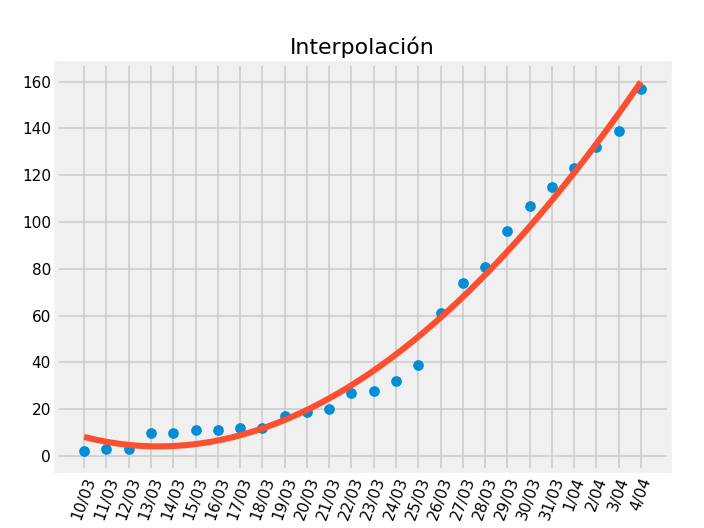

In [149]:
plt.title('Interpolación')
plt.plot(df_bol['Casos\ntotales'], 'o')
plt.plot(xn-1, An@β_pol)

plt.xticks(**params)
plt.show()

plt.show()

<IPython.core.display.Javascript object>


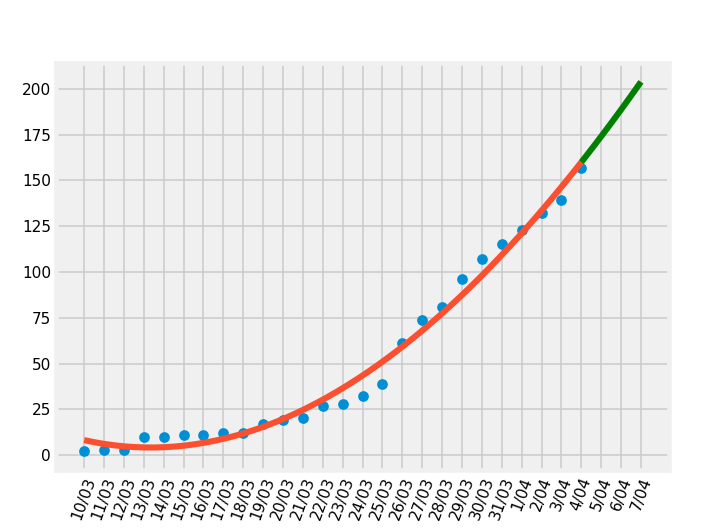

In [150]:
A_pred = ϕ(X_pred[:, 1], orden)
plt.plot(df_bol['Casos\ntotales'], 'o')
plt.plot(xn-1, An@β_pol)

xn_pred = np.linspace(min(A_pred[:, 1]), max(A_pred[:, 1]), num=10)
An_pred = ϕ(xn_pred, orden)
pred_pol = An_pred@β_pol
plt.plot(xn_pred-1, pred_pol, 'g')

plt.xticks(**pred_params)
plt.show()

In [161]:
for d, p in zip(pred_params['labels'][m:], pred_pol[1:]):
    print(f'fecha{d} -> casos:{int(np.round(p))}')

fecha5/04 -> casos:165
fecha6/04 -> casos:169
fecha7/04 -> casos:174
